# Типы данных в pandas

In [1]:
import pandas as pd
from IPython.display import Image

In [2]:
# в последней строчке отображается тип данных серии s - int64
s = pd.Series([10,20,30])
s

0    10
1    20
2    30
dtype: int64

In [3]:
# создаем датафрейме df из списка словарей
d = [{'Наименование': 'ручка', 'Цена': 135.5, 'Количество': 10}, 
     {'Наименование': 'карандаш', 'Цена': 45, 'Количество': 3},
     {'Наименование': 'блокнот','Цена': 100, 'Количество': 1}]
df = pd.DataFrame(d)
df

,Наименование,Цена,Количество
0,ручка,135.5,10
1,карандаш,45.0,3
2,блокнот,100.0,1


In [4]:
# исследуем информацию о датафрейме df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Наименование  3 non-null      object 
 1   Цена          3 non-null      float64
 2   Количество    3 non-null      int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 200.0+ bytes


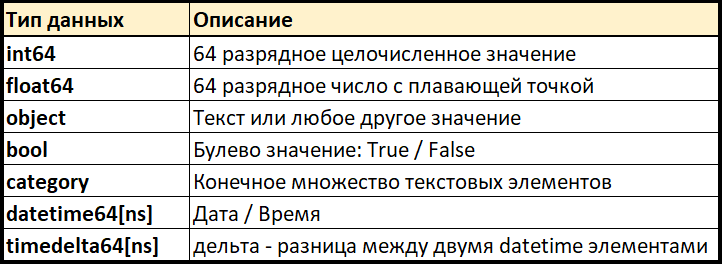

In [5]:
display(Image(filename='files/dtypes.png'))

# Атрибут .dtypes

In [6]:
# Атрибут dtypes есть у структур DataFrame и Series
# Атрибут dtype есть только у структуры Series
print(s.dtype)
print(s.dtypes)
print()
print(df.dtypes)

int64
int64

Наименование     object
Цена            float64
Количество        int64
dtype: object


# Метод .astype()

### В качестве типа данных для приведения могут быть использованы тип pandas или словарь в формате {col: dtype, ...}, где col - имя столбца, а dtype - желаемый тип данных.

# Преобразование типов для структуры Series

In [7]:
# сейчас серия s имеет тип данных 'int64'
print(s)

0    10
1    20
2    30
dtype: int64


In [8]:
# поменяем тип данных серии s с int на float
s.astype('float64')

0    10.0
1    20.0
2    30.0
dtype: float64

# Преобразование типов структуры DataFrame

In [9]:
#вернемся к ранее созданной структуре df и выведем типы данных:
df.dtypes

Наименование     object
Цена            float64
Количество        int64
dtype: object

In [10]:
# Приведем тип колонки 'Количество' к int32:
df['Количество'] = df['Количество'].astype('int32')
df.dtypes

Наименование     object
Цена            float64
Количество        int32
dtype: object

In [11]:
# Вернем прежний тип колонке 'Количество
df = df.astype({'Количество':'int64'})
df.dtypes

Наименование     object
Цена            float64
Количество        int64
dtype: object

# Подготовка (очистка) данных

In [12]:
# Открываем файл с набором данных о погоде
df1 = pd.read_csv('files/погода.csv')
df1

,Температура,Давление,Осадки,Дата
0,-7.9 °C,96294 Па,Да,2022-11-20
1,-10 °C,97293 Па,Да,2022-11-21
2,-9.3 °C,96327 Па,Нет,2022-11-22


In [13]:
# Типы всех полей - object
# в колонках 'Температура' и 'Давление' рядом с интересующим нас численным значением стоит единица измерения
# Даты также представлены в виде строк
df1.dtypes

Температура    object
Давление       object
Осадки         object
Дата           object
dtype: object

In [14]:
# создаем три лямбда-функции, первые две чистят данные от ненужных символов, а третья переводит значения 'Да/Нет' в 'True/False'

temperature = lambda x: x.replace('°C', '').strip()
pressure = lambda x: x.replace('Па', '').strip()
precipitation = lambda x: True if x == 'Да' else False

In [15]:
# Применяем созданные функции к соответсвующим колонкам датафрейма df1
df1['Температура'] = df1['Температура'].apply(temperature)
df1['Давление'] = df1['Давление'].apply(pressure)
df1['Осадки'] = df1['Осадки'].apply(precipitation)
df1

,Температура,Давление,Осадки,Дата
0,-7.9,96294,True,2022-11-20
1,-10,97293,True,2022-11-21
2,-9.3,96327,False,2022-11-22


In [16]:
# теперь данные в колонках очищены от лишних символов
# тип данных изменился только в колонке 'Осадки', в остальных колонках по-прежнему 'object'
df1.dtypes

Температура    object
Давление       object
Осадки           bool
Дата           object
dtype: object

In [17]:
# создаем копии датафрейма df1
df2=df1.copy()
df3=df1.copy()

In [18]:
# изменяем тип данных колонок датафрейма df1 с помощью методов .to_numeric() и .to_datetime()
df1['Температура']=pd.to_numeric(df1['Температура'])
df1['Давление'] = pd.to_numeric(df1['Давление'])
df1['Дата'] = pd.to_datetime(df1['Дата'])
df1.dtypes

Температура           float64
Давление                int64
Осадки                   bool
Дата           datetime64[ns]
dtype: object

In [19]:
# изменяем тип данных колонок датафрейма df2 с помощью метода .astype() c соответствующим параметром
df2['Температура'] = df2['Температура'].astype('float64')
df2['Давление'] = df2['Давление'].astype('int64')
df2['Дата']=df2['Дата'].astype('datetime64[ns]')
df2.dtypes

Температура           float64
Давление                int64
Осадки                   bool
Дата           datetime64[ns]
dtype: object

In [20]:
# изменяем тип данных колонок датафрейма df3 с помощью метода .astype() в одну строчку
df3=df3.astype({'Температура':'float64','Давление':'int64','Дата':'datetime64[ns]'})
df3.dtypes

Температура           float64
Давление                int64
Осадки                   bool
Дата           datetime64[ns]
dtype: object

# Выборка данных по типу

## Метод .select_dtypes()

In [21]:
# включаем в вывод колонки с типами данных 'float64' и 'int64'
# для включения в вывод используем парметр include, в который передаем список с названиями типов данных
df1.select_dtypes(include=['float64', 'int64'])

,Температура,Давление
0,-7.9,96294
1,-10.0,97293
2,-9.3,96327


In [22]:
# исключаем колонку с типом данных 'datetime'
# для исключения из вывода используем парметр exclude, в который передаем название типа данных
df1.select_dtypes(exclude='datetime64[ns]')

,Температура,Давление,Осадки
0,-7.9,96294,True
1,-10.0,97293,True
2,-9.3,96327,False
